# Population and Sample

* In real life we usually want information about everyone's data but we studying everyone's data is not possible.

# Population

* Population means entire group we are interested in.
* It includes every single unit that is related to our study.

**Example**

* If we want to know the height of all students in India, then all student in India is population.

# Sample

* A sample is a smaller part taken from the population.
* Make sure it should be used to represent the population.

**Example**

* If we select 1000 students from India, this group will be sample.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from scipy.stats import skew, kurtosis

**We will create a population**

In [ ]:
np.random.seed(22)
population=np.random.normal(loc = 50, scale = 10, size = 10000)
population

array([49.0805008 , 35.36649347, 60.81791679, ..., 54.96711634,
       44.6147242 , 26.28683601])

In [ ]:
sample=np.random.choice(population, size = 100, replace = False)
sample

array([53.90744492, 50.69148198, 53.11674983, 54.32291309, 26.99760963,
       36.76478701, 58.11907355, 62.06865621, 56.5632956 , 42.13640797,
       55.78167352, 31.461821  , 42.59217839, 44.51946581, 54.13949703,
       58.20601971, 48.32952573, 49.90486906, 47.78824915, 60.71168946,
       26.81903529, 34.57148006, 57.73939188, 30.3066393 , 42.05365456,
       52.84373515, 52.7050267 , 63.24465639, 46.73185758, 42.86653232,
       64.78877781, 30.35219419, 50.78663831, 54.22394958, 59.94414064,
       56.26493456, 45.4244972 , 49.99569586, 49.66955752, 48.34366521,
       54.85495097, 61.34404439, 32.21230631, 52.04012823, 56.37652994,
       58.6311829 , 22.91898021, 54.02117931, 57.58231034, 68.21642572,
       45.37641599, 42.74681518, 46.9987297 , 48.55373833, 56.47570944,
       48.67956281, 54.00180195, 48.2497595 , 56.70805686, 54.31534051,
       59.29871827, 46.17603777, 59.48142519, 45.59701083, 59.53783452,
       20.19534014, 46.99211499, 71.57502201, 51.11356124, 52.70

**Mean**

In [ ]:
populationMean = population.mean()
sampleMean= sample.mean()
print(f'Population mean: {populationMean}')
print(f'Sample mean: {sampleMean}')

Population mean: 50.00560944531678
Sample mean: 50.15342256483584


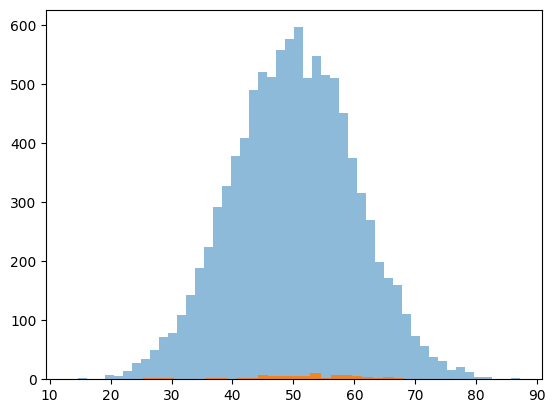

In [ ]:
plt.hist(population,bins=50,alpha=0.5)
plt.hist(sample,bins=30,alpha=0.9)
plt.show()

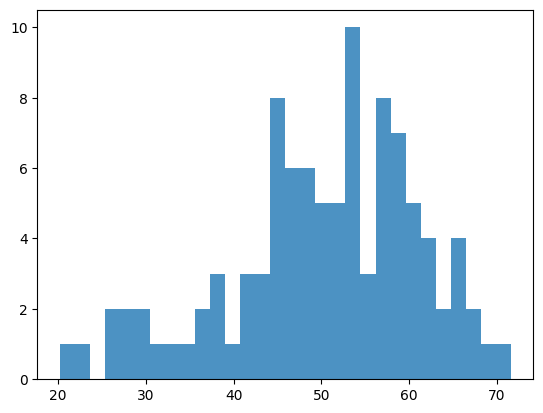

In [ ]:
plt.hist(sample,bins=30,alpha=0.8)
plt.show()

**Parameters**

* Population mean -> mu (μ)
* Population variance -> (σ²)

**Stats**

* Sample mean ->  (x)
* Sample Variance -> (s*s)

In [ ]:
populationVar = population.std()
sampleVar = sample.std()

print(f'Population variance: {populationVar}')
print(f'Sample variance: {sampleVar}')


Population variance: 10.076165580130043
Sample variance: 10.842913859109496


# Sampling methods

* It helps us to decide how we choose our sample from the population

# 1) Random Sampling
* Every individual data points has equal chances of being selected
* It is the most unbiased method.

* **Example**

  * We can use random sampling to generate number of students to select from population

In [ ]:
data = {

    'Gender' : ['Male','Female','Male','Female'], # Nominal data
    'Eductaion' : ['UG','PG','UG','PhD'], # Ordinal
    'Age' : [22,25,21,28], # Discrete
    'Height' : [170.4,165.2,168.9,170] # Continuous
}
data

{'Gender': ['Male', 'Female', 'Male', 'Female'],
 'Eductaion': ['UG', 'PG', 'UG', 'PhD'],
 'Age': [22, 25, 21, 28],
 'Height': [170.4, 165.2, 168.9, 170]}

In [ ]:
df= pd.DataFrame(data)
df

,Gender,Eductaion,Age,Height
0,Male,UG,22,170.4
1,Female,PG,25,165.2
2,Male,UG,21,168.9
3,Female,PhD,28,170.0


In [ ]:
randomSample=df.sample(n = 2,random_state=42) # Here n represents the total number of rows selected from the entire dataset
randomSample # Every row has equal chances to appear

,Gender,Eductaion,Age,Height
1,Female,PG,25,165.2
3,Female,PhD,28,170.0


# 2) Stratified Sampling
* The population is divided into groups (Strata)
* Samples are taken from each group

In [ ]:
# sample 1 male and 1 female
stratifiedSample = df.groupby('Gender').sample(n=1,random_state=42) # n here, represents the number of sample picked from each group(stratum)
stratifiedSample

,Gender,Eductaion,Age,Height
3,Female,PhD,28,170.0
0,Male,UG,22,170.4


# 3) Systematic Sampling
* It selects every n-th element after every random start

In [ ]:
df

,Gender,Eductaion,Age,Height
0,Male,UG,22,170.4
1,Female,PG,25,165.2
2,Male,UG,21,168.9
3,Female,PhD,28,170.0


In [ ]:
systematicSample = df.iloc[::2]
systematicSample

,Gender,Eductaion,Age,Height
0,Male,UG,22,170.4
2,Male,UG,21,168.9


# Bias and Sampling Errors

**Bias**
* Bias occurs when the sample is not representing the population.
* **Example**
    * Conducting survey for the country but sampling based on city.
    * Conducting only online surveys.

In [ ]:
df

,Gender,Eductaion,Age,Height
0,Male,UG,22,170.4
1,Female,PG,25,165.2
2,Male,UG,21,168.9
3,Female,PhD,28,170.0


In [ ]:
# We are selecting only female

biasedSample = df[df['Gender'] == 'Female']
biasedSample

,Gender,Eductaion,Age,Height
1,Female,PG,25,165.2
3,Female,PhD,28,170.0


# **Sampling Distribution**
* A sampling distribution is the distribution of statistics(mean, variance, proportion) that we get from all samples of fixed size from a population.
* When we take one sample, we get many sample means.
* The distribution of these sample means' is called as sampling distribution.

# **Sampling distribution of mean**
* We take meany samples of size n.
* we will find the mean of each sample.
* Plot those mean.

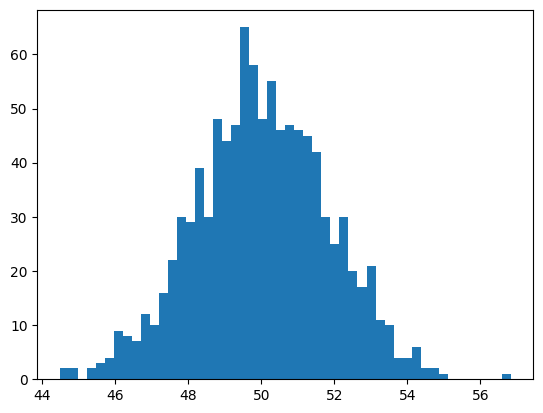

In [ ]:
sample_mean = []
for i in range(1000):
  sample = np.random.choice(population, size=30, replace=False)
  sample_mean.append(sample.mean())
plt.hist(sample_mean,bins = 50)
plt.show()

In [ ]:
print(f'Skew: {skew(sample_mean)}')
print(f"Kurtosis: {kurtosis(sample_mean)}")

Skew: -0.01581847024916337
Kurtosis: -0.015200270422275342


# Standard
* Standard error is the STD of the sample distribution. It measures how accurate the sample mean is when we compare population mean.

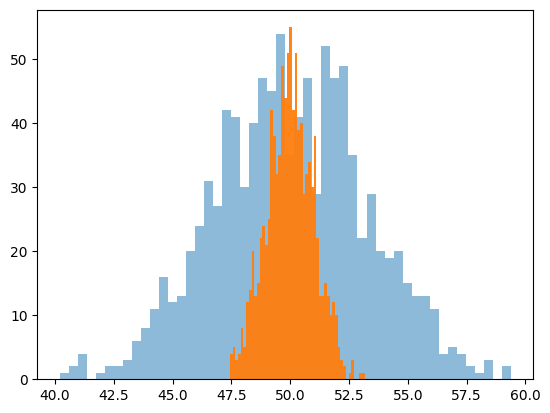

In [ ]:
mean_n10 = []
mean_n100 = []
for i in range(1000):
  mean_n10.append(np.random.choice(population,10).mean())
  mean_n100.append(np.random.choice(population,100).mean())

plt.hist(mean_n10,bins=50,alpha=0.5)
plt.hist(mean_n100,bins=50,alpha=0.95)
plt.show()

**Insight**
* When n = 10 -> Wider spread( more STD )
* When n = 100 -> Narrow spread( less STD )
* This is standard error reducing

In [ ]:
np.std(mean_n10), np.std(mean_n100)

(np.float64(3.2159486350031994), np.float64(0.9903668572566968))

# **Central Limit Theorem(CLT)**
* According to the CLT , the sampling distribution of sample mean gives normal distribution as the sample size increases, regardless of the shape of population, it will be normally distributed.
* Population distribution can be anyhting(skewed, weired, uniform).
* Sample means will be normally distributed

**Why CLT works**
* Each sample mean is an average.
* Since we use average it smooth out the extreme values
* We repeating average calculation which vreated bell-shaped curve.

In [ ]:
population1= np.random.exponential(scale = 2, size = 100000)

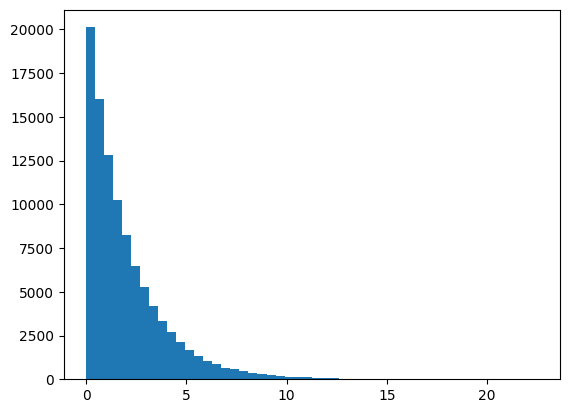

In [ ]:
plt.hist(population1, bins = 50)
plt.show()

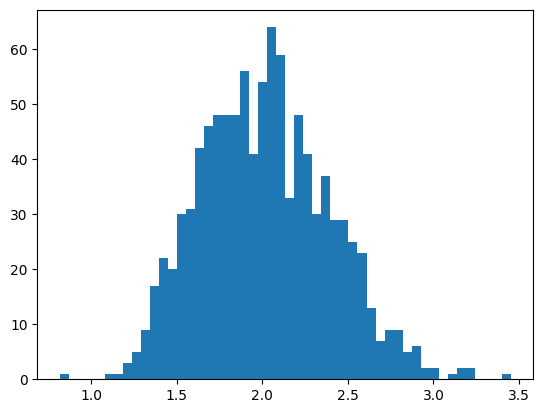

In [ ]:
sample_mean = []
for i in range(1000):
  sample = np.random.choice(population1, size=30, replace=False)
  sample_mean.append(sample.mean())
plt.hist(sample_mean,bins = 50)
plt.show()

**Insight**
* Even though population is skewed
* Sampling distribution of mean is approximately normal

# **Estimation Theorm**
* In real life, population parameters are unknown, so we estimate them using sample data.
* It is a process of using sample statistics to infer population parameters.
* There are two types of estimation
   * 1) Point Estimation
   * 2) Interval Estimation

# **1) Point Estimation**
* Point estimation gives a single numerical value as an estimate of population parameter.
* Sample mean is treated as estimator.
  * Population mean = unknown.
  * Sample mean = known

**Limitation**
* It doesn't tell how accurate the estimate is.

In [ ]:
sample = np.random.choice(population,50)
population.mean(), sample.mean()

(np.float64(50.00560944531678), np.float64(51.58430011613316))

**Insight**
* Sample mean estimates population mean
* But it is exact

# **2) Interval Estimation**

* Interval estimation gives a range of values within which we can say the population is having more chances to lie.
> The range is called a Confidence Interval(CI)
* Confidence interval gives us value that are created from sample data that is likely to contain the true population parameter.
* **Example**:
    * **95% condidence level**: If we take many samples and then we constructed confidence interval, 95% of those intervals will contain the population parameters.


# **Confidence Interval**
* There are two cases
* Case1: When population STD is known




**Implementation**

In [ ]:
sample

array([51.45758724, 70.94569602, 37.75512952, 37.38942081, 46.9987297 ,
       37.86747435, 30.50652443, 49.62222293, 72.68086066, 54.98264013,
       36.07346278, 68.51781569, 43.52389154, 41.6796345 , 61.96755097,
       48.48809367, 40.80844706, 53.37066233, 47.17352333, 40.96915177,
       79.02938957, 43.0378882 , 45.66357   , 57.55284328, 69.43522915,
       45.8275307 , 76.6109178 , 53.02862561, 36.44159664, 30.17110301,
       39.07314586, 61.51493489, 43.70945799, 59.88017132, 47.79731592,
       66.73584319, 64.3893991 , 58.40790751, 55.21969988, 51.88697391,
       58.45564239, 67.69776965, 62.83596455, 24.8682605 , 39.20074164,
       34.89475534, 68.93210503, 65.52322462, 49.35998289, 49.25449626])

In [ ]:
import scipy.stats as stats
xBar  = sample.mean()
s = sample.std(ddof=1)
n = len(sample)

ci = stats.t.interval(0.95, df = n-1, loc = xBar, scale = s/np.sqrt(n))
print(f'Min Parameter Value: {ci[0]} and Max Parameter Value: {ci[1]}')


Min Parameter Value: 47.8535080677275 and Max Parameter Value: 55.31509216453881


**Insight**
>Interval gives us a range.
>The true mean will likely be inside that range

# Margin of Error

> Margin of error is the maximum expected difference between the sample estimate and the Actual population value.

> `MOE = z*np.sqrt(pHat (1-pHat)/n)`

In [ ]:
data = np.random.choice([0,1], size = 500, p= [0.4,0.6])

pHat = data.mean()
n = len(data)

z = 1.96

MOE = z* np.sqrt(pHat*(1-pHat)/n)

print(f'{pHat - MOE}, {pHat+MOE}')


0.5672468330997574, 0.6527531669002425


**Insight**
* We have estimated that 56% to 64% of people support candidate A with 95% confidence.

In [ ]:
data

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,

---
# **Hypothesis Testing**

* It is a way to make decisions about population using sample data
* We often have some claims or assumptions about a population.
* We use sample data to decide whether those claims are reasonable or not

# **Null Hypothesis(H0)**
* This hypothesis shows the default assumption.
* It usually means there is no effect, no difference
* Example:
  * Average salary: 50000
  * New Drug has no effect

# **Alternate Hypothesis(H1)**

* The Alternate Hypothesis represents what we want to test or prove
* It contradicts our Null Hypothesis
* Example:
  * Average salary!= 50000
  * New drug has positive effect(improves recovery)

# **One Tailed vs Two Tailed Test**

**One Tailed Test**
* It is the test of a directional effect
* It looks at one side of the distribution
* Example:
  * H1 = sample mean > population mean
  * H1 = sample mean < population mean

**Two Tailed Test**
* It tests for any direction
* It looks for both sides of distribution
* Example:
  * H1 = sample != population mean

# **Test statistics**
* It is a standardized value calculated from a sample data
> It tells us how far the sample result is from the null hypothesis in std unit

# **Significance level (alpha)**
* It is the possibility of rejecting a true null hypothesis
* We choose alpha before testing

**Common Alpha**
* 0.05 (most common)
* 0.01
* 0.10
> alpha = 1 - Confidence level

# **P-value**

* small p value -> strong evidence against H0
* large p value -> weak evidence against H0

**Decision Rule**

* If pValue <= aplha -> Reject H0
* If pValue > aplha -> Accept H0

# **1)t-test**

In [ ]:
population = np.random.normal(50,10,100000)
sample = np.random.choice(population, 50)

t_stats , p_value = stats.ttest_1samp(sample,50)
print(t_stats,p_value)

-0.612547938265851 0.5430077489015295


In [ ]:
alpha = 0.05
if p_value <= alpha:
  print(f'Reject the Null Hypothesis')
else:
  print(f'Accept the Null Hypothesis')

Accept the Null Hypothesis


# **2)Z-Test**
* When we are comparing population means
* The sample size is large(>30)
* **Cruicially: The population variance should be known**



> **Note:**
    
    * In real world data, we rarely know the true population variance, so T-Test are much more common that Z-Test





**Question:**
* Lets test of the Gentoo penguins

In [ ]:
import seaborn as sb
df=sb.load_dataset('penguins').dropna()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [ ]:
df.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [ ]:
gentooMass = df[df['species']=='Gentoo']['body_mass_g']
gentooMass

,body_mass_g
220,4500.0
221,5700.0
222,4450.0
223,5700.0
224,5400.0
...,...
338,4925.0
340,4850.0
341,5750.0
342,5200.0


# **Z-Test**

In [ ]:
from statsmodels.stats.weightstats import ztest

# H0 = means mass = 5000g
# H1 = mean mass != 5000g

z_stat, pvalue = ztest(gentooMass, value = 5030)
print(pvalue)

0.17439892042652338


In [ ]:
if pvalue<0.05:
  print(f'Reject the Null Hypothesis')
else:
  print(f'Accept the Null Hypothesis')

Accept the Null Hypothesis


# **T-Test**
* When sample size is small(<30) or population variance is unknown
* **1) One sample T-Test:**
    * When we test if a sample mean differ from a specific value

**We have a theory that travellers on Titanic were mostly 35 years old.**

In [ ]:
df1 = sb.load_dataset('titanic')
df1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
titanic_ages = df1['age'].dropna()
titanic_ages

,age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
885,39.0
886,27.0
887,19.0
889,26.0


In [ ]:
import scipy.stats as stats

# H0 = Mean Age = 35
# H1 = Mean Age != 35

sample_ages = titanic_ages.sample(n=25, random_state=42)

t_stat, pvalue = stats.ttest_1samp(sample_ages, 35)
print(f'{pvalue:.10f}')

0.0277064992


**2. Independent Two sample T-Test**
* When we are comparinf meanof two unrelated groups

In [ ]:
penguin = sb.load_dataset('penguins').dropna()

males = penguin[penguin['sex'] == 'Male']['body_mass_g']
females = penguin[penguin['sex'] == 'Female']['body_mass_g']

male_sample = males.sample(n = 20, random_state=42)
female_sample = females.sample(n = 20, random_state=42)

# H0 = Mean Male male == Mean Female Mass
# H1 = Mean Male Mass != Mean Female Mass


t_stat, pvalue = stats.ttest_ind(male_sample,female_sample)
pvalue

np.float64(0.00020265336163451632)

**3) Paired T-Test (Dependent)**
* We compare mean of the same group at different time period(Before vs After)

In [ ]:

# Weight loss Simulation

before = np.array([80,85,78,90,82])
after = np.array([72,70,77,68,75])

# H0 = Mean difference = 0 (No weight loss)
# H1 = Mean difference != 0 (There is some changes)

t_stat, pvalue = stats.ttest_rel(before,after)
pvalue

np.float64(0.04267950431271445)

# **3)Anova (Analysis of Variance)**
* When we want to compare mean of 3 or more groups simultaneously
* We can use multiple t-test, but it will increase the risk of errors.

In [ ]:
iris = sb.load_dataset('iris')

iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# Group Data

setosa = iris[iris['species'] == 'setosa']['petal_width']
versicolor = iris[iris['species'] == 'versicolor']['petal_length']
virginica = iris[iris['species'] == 'virginica']['petal_length']

# H0 = Mean of all groups are same
# H1 = At least one man is different

f_stat, pvalue = stats.f_oneway(setosa,versicolor,virginica)
f_stat,pvalue

# The petal length differs across the species

(np.float64(2140.457704743421), np.float64(2.0052771736472064e-109))

In [ ]:
penguin = penguin[['body_mass_g','sex','species']]
penguin

,body_mass_g,sex,species
0,3750.0,Male,Adelie
1,3800.0,Female,Adelie
2,3250.0,Female,Adelie
4,3450.0,Female,Adelie
5,3650.0,Male,Adelie
...,...,...,...
338,4925.0,Female,Gentoo
340,4850.0,Female,Gentoo
341,5750.0,Male,Gentoo
342,5200.0,Female,Gentoo


In [ ]:
df_sample = penguin.groupby(['sex','species'],group_keys=False).apply(lambda x: x.sample(n=min(10,len(x)),random_state=42))
df_sample

/tmp/ipython-input-4069717110.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sample = penguin.groupby(['sex','species'],group_keys=False).apply(lambda x: x.sample(n=min(10,len(x)),random_state=42))


,body_mass_g,sex,species
12,3200.0,Female,Adelie
132,3500.0,Female,Adelie
40,3150.0,Female,Adelie
1,3800.0,Female,Adelie
62,3600.0,Female,Adelie
150,3700.0,Female,Adelie
25,3800.0,Female,Adelie
74,3700.0,Female,Adelie
28,3150.0,Female,Adelie
116,2900.0,Female,Adelie


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
model = ols('body_mass_g ~ C(sex) * C(species)',data = df_sample).fit()


In [ ]:
anovaTable = sm.stats.anova_lm(model,typ = 2)
anovaTable

,sum_sq,df,F,PR(>F)
C(sex),5812593.75,1.0,55.591505,7.490828e-10
C(species),28962062.50,2.0,138.496231,5.489626e-22
C(sex):C(species),216187.50,2.0,1.033806,3.625817e-01
Residual,5646187.50,54.0,NaN,NaN


In [ ]:
ols.plot(anovaTable)
ols.show()

AttributeError: 'function' object has no attribute 'plot'